Курсовая работа студента БФИ2203 Кубатина Дмитрия

In [9]:
import csv
import matplotlib.pyplot as plt
from dateutil.parser import parse
spChar = ['`','~','!','@','#','$','^','&','*','(',')','_','+','=','{','[','}','}','|',':',';','<',',','>','.','?','/', '\\']
spChar2 = ['"', "'", '%', '-']
source = open("filename.csv", encoding="utf-8-sig") 
reader = csv.reader(source)
rows = list(reader)


#Проверки правильности заполнения исходного файла
errorless = True
#если ошибок не будет, вывод этой ячейки должн быть чист и программа продолжит работу
#в противном случае, ошибка и место ошибки будут выведены, а остальной код не будет работать
for row in rows:    
    if (row != rows[0]):
        #Общий формат файла
        if (len(row) != 7):
            print("Файл неправильно отформатирован")
            print(row)
            errorless = False
            break
        #Номер заказа
        try:
            int(row[0])
        except:
            print("Номер заказа не совпадает с форматом шаблона")
            print(row[0])
            errorless = False
            break
        #Дата заказа
        try:
            parse(row[1], fuzzy = False)
        except:
            print("Дата заказа указана неверно")
            print(row[1])
            errorless = False
            break
        #Название товара
        if any((char in spChar) for char in row[2]):
            print("Название товара указана неверно")
            print(row[2])
            errorless = False
            break
        #Категория товара
        if any((char in spChar) for char in row[3]) or any((char in spChar2) for char in row[3]) or any((char.isdigit()) for char in row[3]):
            print("Категория товара указана неверно")
            print(row[3])
            errorless = False
            break
        #Количество продаж
        try:
            int(row[4])
        except:
            print("Количество продаж указано неверно")
            print(row[4])
            errorless = False
            break
        #Цена за единицу
        try:
            float(row[5])
        except:
            print("Цена единицы товара указана неверно")
            print(row[5])
            errorless = False
            break
        #Общая стоимость
        try:
            float(row[6])
        except:
            print("Общая стоимость товаров указана неверно")
            print(row[6])
            errorless = False
            break
        if ((int(row[4]) * float(row[5])) != float(row[6])):
            print("Общая стоимость товара не совпадает с произвоизведением цены за товар и количества товаров")
            print(int(row[4]) * float(row[5]))
            print(float(row[6]))
            print(row)
            errorless = False
            break

In [10]:
#Алгоритмы сортировки
def quick_sort(row, key):
    if len(row) <= 1:
        return row
    pivot = row[len(row) // 2]
    left = [x for x in row if float(x[key]) < float(pivot[key])]
    middle = [x for x in row if float(x[key]) == float(pivot[key])]
    right = [x for x in row if float(x[key]) > float(pivot[key])]
    return quick_sort(left, key) + middle + quick_sort(right, key)

def bubble_sort(row, key):
    n = len(row)
    for i in range(n):
        for j in range(0, n-i-1):
            if (float(row[j][0][key]) > float(row[j+1][0][key])):
                row[j], row[j+1] = row[j+1], row[j]

In [11]:
if (errorless):
    #Хеширование для облегчения поиска среди товаров
    hashTable = [None] * (len(rows) - 1)
    for i in range(len(hashTable)):
        hashTable[i] = []

    def hash(key):
        kkey = ""
        for i in key:
            kkey += str(ord(i)) 
        return int(kkey) % (len(rows) - 1)

    def insert(key, value):
        i = hash(key)
        hashTable[i].append(value)

    for row in rows:
        if (row != rows[0]):
            insert(row[2], row)

    #удаление пустых строк в хеш таблице
    while ([] in hashTable):
        for i in hashTable:
            if (i == []):
                hashTable.remove(i)
                break

In [12]:
if (errorless):
    #Подсчёт общей выручки
    summ = 0
    for row in rows:
        if (row != rows[0]):
            summ += float(row[6])
    print("Общая выручка магазина:", summ)

Общая выручка магазина: 188760.0


In [13]:
if (errorless):
    #поиск самого большого количества проданных товаров и выручки в хеш таблице
    maxQuantity = 0
    itemName1 = ""
    itemName2 = ""
    maxPrice = 0
    for itemType in hashTable:
        quantity = 0
        name1 = ""
        price = 0
        name2 = ""
        for item in itemType:
            quantity += int(item[4])
            name1 = item[2]
            price += float(item[6])
            name2 = item[2]
        if (maxQuantity < quantity):
            maxQuantity = quantity
            itemName1 = name1
        if (maxPrice < price):
            maxPrice = price
            itemName2 = name2
    print("Больше всего был продан товар:", '"', itemName1, '"', "-" , maxQuantity, "раз.")
    print("Больше всего выручки принёс товар:", '"', itemName2, '"', "-", maxPrice, "рублей.")

Больше всего был продан товар: " Молоко 3% " - 505 раз.
Больше всего выручки принёс товар: " Колбаса "Сервелат Кремлёвский" 200г " - 102000.0 рублей.


In [14]:
if (errorless):
    #с помощью сортировки хеш таблицы ищем какой товар принёс максимальную выручку с одного чека
    #для начала отсортируем каждую строку хеш таблицы, чтобы в начале каждой строки стоял товар с наибольшей выручкой в своей категории
    for itemType in hashTable:
        j = 0
        for i in range(len(hashTable)):
            if (itemType == hashTable[i]):
                j = i
        itemType = quick_sort(itemType, 6)
        itemType.reverse()
        hashTable[j] = itemType
    #далее, сортируем строки хеш таблицы, чтобы первой стояла строка с товаром с максимальной выручкой с одного чека
    bubble_sort(hashTable, 6)
    hashTable.reverse()
    print("Больше всего выручки с одного чека принёс товар:", '"', hashTable[0][0][2], '"', "-", float(hashTable[0][0][6]), "рублей")

    #с помощью сортировки хеш таблицы ищем какой товар был продан большее количество раз в одном чеке
    #для начала отсортируем каждую строку хеш таблицы, чтобы в начале каждой строки стоял товар с наибольшими продажами в своей категории
    for itemType in hashTable:
        j = 0
        for i in range(len(hashTable)):
            if (itemType == hashTable[i]):
                j = i
        itemType = quick_sort(itemType, 4)
        itemType.reverse()
        hashTable[j] = itemType
    #далее, сортируем строки хеш таблицы, чтобы первой стояла строка с товаром с максимальным количеством продаж в одном чеке
    bubble_sort(hashTable, 4)
    hashTable.reverse()
    print("Больше всего раз в одном чеке был продан товар:", '"', hashTable[0][0][2], '"', "-", int(hashTable[0][0][4]), "раз")

Больше всего выручки с одного чека принёс товар: " Колбаса "Сервелат Кремлёвский" 200г " - 50000.0 рублей
Больше всего раз в одном чеке был продан товар: " Молоко 3% " - 205 раз


In [15]:
if (errorless):
    #составление отчёта о количестве продаж каждого товара и его доле в общей выручке магазина
    itemCount2 = []
    totalPrice2 = []
    names = []
    for itemType in hashTable:
        itemCount = 0
        totalPrice = 0
        for item in itemType:
            itemCount += float(item[4])
            totalPrice += float(item[6])
        itemCount2.append(itemCount)
        totalPrice2.append(totalPrice)
        names.append(itemType[0][2])
        print("=============================================================================================")
        print("Товар", '"', itemType[0][2], '"', "был продан", itemCount, "раз.")
        print("Выручка с", '"', itemType[0][2], '"', "составляет", round(totalPrice/ summ * 100, 3), "% от общей выручки")
    print("=============================================================================================")

Товар " Молоко 3% " был продан 505.0 раз.
Выручка с " Молоко 3% " составляет 21.403 % от общей выручки
Товар " Колбаса "Сервелат Кремлёвский" 200г " был продан 408.0 раз.
Выручка с " Колбаса "Сервелат Кремлёвский" 200г " составляет 54.037 % от общей выручки
Товар " Кефир 1% " был продан 202.0 раз.
Выручка с " Кефир 1% " составляет 8.561 % от общей выручки
Товар " Печенье "Юбилейное" " был продан 78.0 раз.
Выручка с " Печенье "Юбилейное" " составляет 2.066 % от общей выручки
Товар " Торт "Три Шоколада" " был продан 39.0 раз.
Выручка с " Торт "Три Шоколада" " составляет 10.331 % от общей выручки
Товар " Лимонад "Тархун" Черноголовка 1л " был продан 12.0 раз.
Выручка с " Лимонад "Тархун" Черноголовка 1л " составляет 0.636 % от общей выручки
Товар " Пицца "4 Сыра" " был продан 12.0 раз.
Выручка с " Пицца "4 Сыра" " составляет 1.907 % от общей выручки
Товар " Сыр Тильзитер 150г " был продан 8.0 раз.
Выручка с " Сыр Тильзитер 150г " составляет 1.06 % от общей выручки


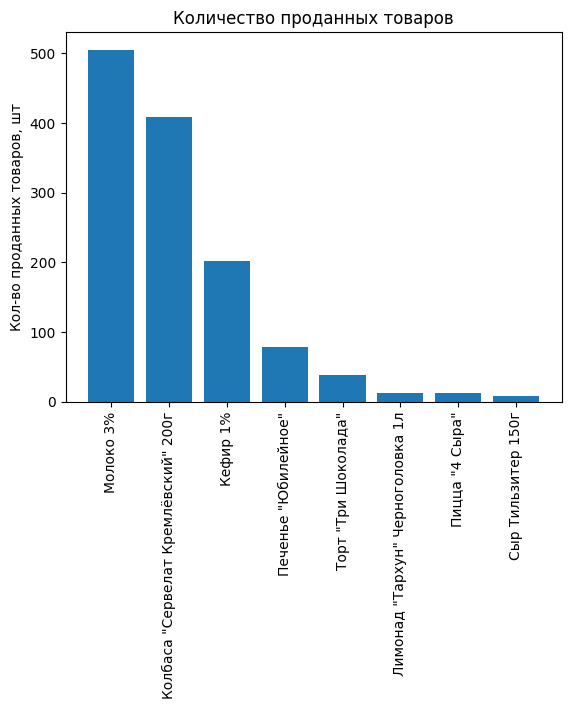

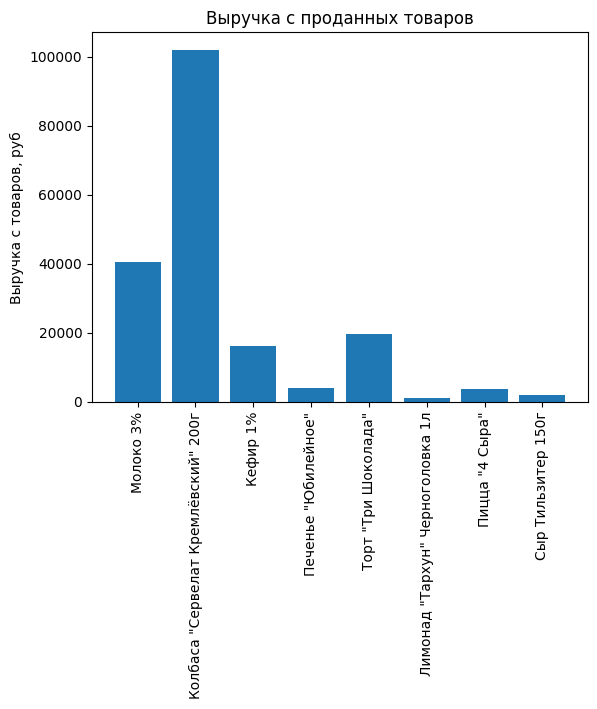

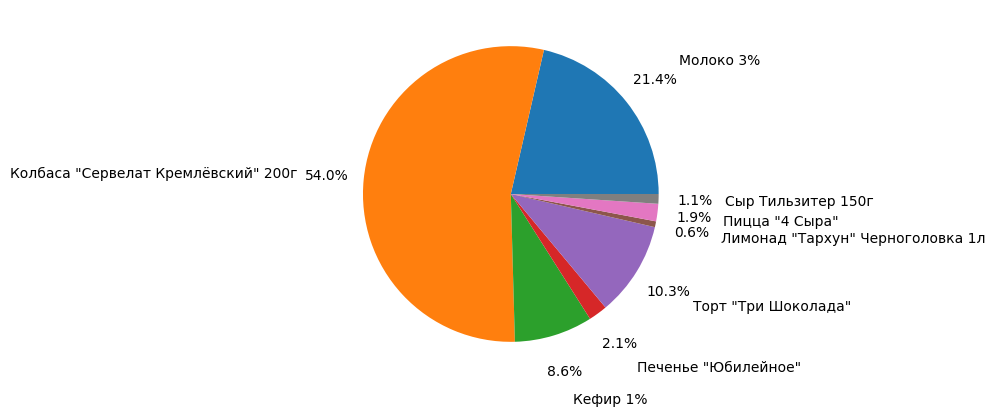

In [16]:
if (errorless):
    #отображение количества проданных товаров каждого вида в виде столбчатой диаграммы
    plt.bar(names, itemCount2, label = "itemCount")
    plt.title("Количество проданных товаров")
    plt.ylabel("Кол-во проданных товаров, шт") 
    plt.xticks(rotation='vertical')
    plt.show()

    #отображение выручки с каждого вида товаров в виде столбчатой диаграммы
    plt.bar(names, totalPrice2, label = "totalPrice")
    plt.title("Выручка с проданных товаров")
    plt.ylabel("Выручка с товаров, руб") 
    plt.xticks(rotation='vertical')
    plt.show()

    #отображение доли выручки каждого товара в виде круговой диаграммы
    fig, ax = plt.subplots()
    ax.pie(totalPrice2, labels = names, autopct = '%1.1f%%', pctdistance = 1.25, labeldistance = 1.45)